# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# hat's the shape of an traffic sign image?
image_shape = X_train[0].shape

# print(X_train[30].squeeze())

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

1


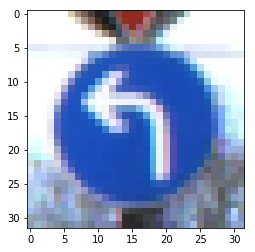

In [14]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np

index = random.randint(0, n_train)
image = X_train[index].squeeze()

plt.imshow(X_test[32])
#plt.imshow(image)
print(y_test[24])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


### I proceeded without any pre-process work

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sig = 0.1
    
    #solution : layer1 : convolutional  input = 32x32x3, filter = 5x5x3x20, output = 28x28x20
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,3,20), mean = mu, stddev = sig), name = 'conv1_W')
    
    #Apply xavier initializer
    conv1_W = tf.get_variable("conv1_W", shape = (5,5,3,20), initializer = tf.contrib.layers.xavier_initializer())
    
    conv1_b = tf.Variable(tf.zeros(20), name = 'conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    #solution : Activation by Relu
    conv1 = tf.nn.relu(conv1)
    
    #Apply Drop out
    #conv1 = tf.nn.dropout(conv1, keep_prob = keep_prob_train)
    
    #solution : sub sampling by MAX POOLING   input = 28x28x20, kernel = 2x2, output = 14x14x20
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #solution : Layer2 : convolutional  input = 14x14x20, filter = 5x5x20x50, output = 10x10x50
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,20,50), mean = mu, stddev = sig), name = 'conv2_W')
    
    #Apply xavier initializer
    conv2_W = tf.get_variable("conv2_W", shape = (5,5,20,50), initializer = tf.contrib.layers.xavier_initializer())
    
    conv2_b = tf.Variable(tf.zeros(50), name = 'conv2_b')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    #solution : Acitvation by Relu
    
    conv2 = tf.nn.relu(conv2)
    
    #Apply Drop out
    #conv2 = tf.nn.dropout(conv2, keep_prob = keep_prob_train)
    
    #solution : sub sampling by MAX POOLING  input = 10x10x50, kernel = 2x2, output = 5x5x50
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #solution : flatten  input = 5x5x50, output = 1x1250
    fc0 = flatten(conv2)
    
    #solution : Layer3 : Fully Connected  input = 1x1250, Weight = 1250x200, output = 1x200
    fc1_W = tf.Variable(tf.truncated_normal(shape = (1250,200), mean = mu, stddev = sig), name = 'fc1_W')
    
    #Apply xavier initializer
    fc1_W = tf.get_variable("fc1_W", shape = (1250,200), initializer = tf.contrib.layers.xavier_initializer())
    
    fc1_b = tf.Variable(tf.zeros(200), name = 'fc1_b')
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    #solution : Activation by Relu
    fc1 = tf.nn.relu(fc1)
    
    #Apply Drop out
    #fc1 = tf.nn.dropout(fc1, keep_prob = 0.7)    
    
    #solution : Layer4 : Fully Connected  input = 1x200, weight = 200x100, output = 1x100
    fc2_W = tf.Variable(tf.truncated_normal(shape = (200,100), mean = mu, stddev = sig), name = 'fc2_W')
    
    #Apply xavier initializer
    fc2_W = tf.get_variable("fc2_W", shape = (200,100), initializer = tf.contrib.layers.xavier_initializer())
    
    fc2_b = tf.Variable(tf.zeros(100), name = 'fc2_b')
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #solution : Activation by Relu
    fc2 = tf.nn.relu(fc2)
    
    #Apply Drop out
    #fc2 = tf.nn.dropout(fc2, keep_prob = 0.7) 
    
    #solution : Layer5 : Fully Connected  input = 1x100, weight = 100x43, output = 1x43
    fc3_W = tf.Variable(tf.truncated_normal(shape = (100,43), mean = mu, stddev = sig), name = 'fc3_W')
    
    #Apply xavier initializer
    fc3_W = tf.get_variable("fc3_W", shape = (100,43), initializer = tf.contrib.layers.xavier_initializer())
    
    fc3_b = tf.Variable(tf.zeros(43), name = 'fc3_b')
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    logits = fc3
    
    return logits

In [6]:
def LeNet_test(x):
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    fc0 = flatten(conv2)
    
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    logits = fc3
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [7]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
x = tf.placeholder(tf.float32, (None, 32,32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Define Training Data

In [9]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


### Define Model Evaluation

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y:batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

### Train the model

In [13]:
EPOCHS = 12
BATCH_SIZE = 128

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training....")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})
        validation_accuracy = evaluate(X_valid,y_valid)
        print("EPOCH : {}".format(i+1))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver = tf.train.Saver()
    saver.save(sess, 'lenet.ckpt')
    print("Value saved")

Training....

EPOCH : 1
Validation accuracy = 0.865

EPOCH : 2
Validation accuracy = 0.907

EPOCH : 3
Validation accuracy = 0.893

EPOCH : 4
Validation accuracy = 0.928

EPOCH : 5
Validation accuracy = 0.928

EPOCH : 6
Validation accuracy = 0.908

EPOCH : 7
Validation accuracy = 0.945

EPOCH : 8
Validation accuracy = 0.891

EPOCH : 9
Validation accuracy = 0.921

EPOCH : 10
Validation accuracy = 0.932

EPOCH : 11
Validation accuracy = 0.933

EPOCH : 12
Validation accuracy = 0.949

Value saved


### Validate accuracy on test data

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.ckpt.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet.ckpt
Test Accuracy = 0.926


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

new_1 = 'resized_traffic_sign_1.png'
new_1 = Image.open(new_1)

new_2 = 'resized_traffic_sign_2.png'
new_2 = Image.open(new_2)

new_3 = 'resized_traffic_sign_3.png'
new_3 = Image.open(new_3)

new_4 = 'resized_traffic_sign_4.png'
new_4 = Image.open(new_4)

new_5 = 'resized_traffic_sign_5.png'
new_5 = Image.open(new_5)

image = []

#image = np.array(new_1, dtype = np.float32)
#image = image[np.newaxis]

im_1 = np.array(new_1, dtype = np.float32)
im_2 = np.array(new_2, dtype = np.float32)
im_3 = np.array(new_3, dtype = np.float32)
im_4 = np.array(new_4, dtype = np.float32)
im_5 = np.array(new_5, dtype = np.float32)

image.append(im_1)
image.append(im_2)
image.append(im_3)
image.append(im_4)
image.append(im_5)

In [17]:
tf.reset_default_graph()

conv1_W = tf.get_variable('conv1_W', shape = (5,5,3,20))
conv1_b = tf.get_variable('conv1_b', shape = (20))
conv2_W = tf.get_variable('conv2_W', shape = (5,5,20,50))
conv2_b = tf.get_variable('conv2_b', shape = (50))
fc1_W = tf.get_variable('fc1_W', shape = (1250,200))
fc1_b = tf.get_variable('fc1_b',shape = (200))
fc2_W = tf.get_variable('fc2_W',shape = (200,100))
fc2_b = tf.get_variable('fc2_b',shape = (100))
fc3_W = tf.get_variable('fc3_W',shape = (100,43))
fc3_b = tf.get_variable('fc3_b',shape = (43))

saver = tf.train.Saver()

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "lenet.ckpt")
    print("Model restored.")

    
    softmax_new_images = []
    
    for i in range(5):
        image_final = [tf.cast(image[i], tf.float32)]
        test_index = LeNet_test(image_final)
        logits = sess.run(test_index)
        index_test = tf.argmax(logits, 1)
        softmax_new_images.append(sess.run(tf.nn.softmax(logits)))
        print("Y value for image", i+1, ":", sess.run(index_test))
    
    print(sess.run(tf.nn.top_k(tf.constant(np.squeeze(softmax_new_images)), k=5)))


INFO:tensorflow:Restoring parameters from lenet.ckpt
Model restored.
Y value for image 1 : [24]
Y value for image 2 : [42]
Y value for image 3 : [17]
Y value for image 4 : [17]
Y value for image 5 : [32]
TopKV2(values=array([[  9.98950839e-01,   1.04917272e-03,   9.42238146e-36,
          0.00000000e+00,   0.00000000e+00],
       [  9.99996781e-01,   3.21491916e-06,   6.02301844e-18,
          2.93636573e-36,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.19191096e-32,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.99976397e-01,   2.35612442e-05,   3.92698083e-20,
          3.48777783e-34,   2.27899434e-36]], dtype=float32), indices=array([[24, 17, 10,  0,  1],
       [42, 17, 10, 34,  0],
       [17,  0,  1,  2,  3],
       [17, 10,  0,  1,  2],
       [32, 34, 24, 17, 10]], dtype=int32))


In [ ]:
## calculate accuracy
# only 1 (new_3) was correct
# It is 20% accuracy